Number of data points on June 5th: 24


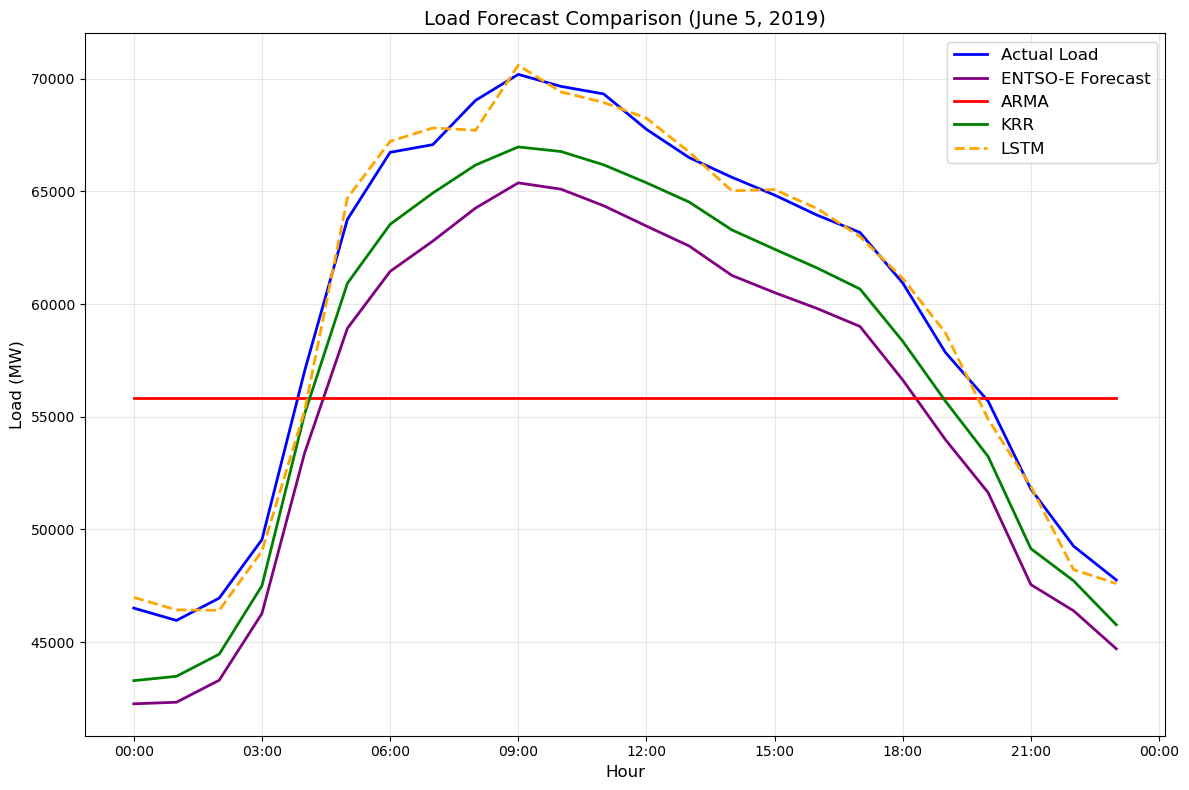

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Load the cleaned dataset
file_path = '../data/germany_cleaned_load_data.csv'
df = pd.read_csv(file_path, parse_dates=['utc_timestamp'])
df.set_index('utc_timestamp', inplace=True)

# Filter for 5 June 2019
specific_date = '2019-06-05'
start = f'{specific_date} 00:00:00'
end = f'{specific_date} 23:00:00'
june_5th_data = df.loc[start:end]

print(f"Number of data points on June 5th: {len(june_5th_data)}")

# Your model predictions for June 5th (hourly values 0-23)
arma_predictions = [55827.86] * 24  # Constant value
krr_predictions = [43291.21, 43484.01, 44466.75, 47502.50, 55135.82, 60921.16, 63538.49, 64928.11, 66171.71, 66974.49, 66771.55, 66180.19, 65385.10, 64529.88, 63293.41, 62435.79, 61599.23, 60669.65, 58352.26, 55691.60, 53232.95, 49147.31, 47721.86, 45768.51]
lstm_predictions = [46983.66, 46431.12, 46413.48, 49039.78, 55275.28, 64706.80, 67221.14, 67815.54, 67714.56, 70598.53, 69414.50, 68948.75, 68251.98, 66748.71, 65025.38, 65083.01, 64236.30, 62997.54, 61144.32, 58723.91, 54892.00, 51907.90, 48219.99, 47599.54]

# Create visualization with all 5 lines
plt.figure(figsize=(12, 8))

# Plot actual load and ENTSO-E forecast
plt.plot(june_5th_data.index, june_5th_data['DE_load_actual_entsoe_transparency'], 
         label="Actual Load", color="blue", linewidth=2)
plt.plot(june_5th_data.index, june_5th_data['DE_load_forecast_entsoe_transparency'], 
         label="ENTSO-E Forecast", color="purple", linewidth=2)

# Plot your model predictions
plt.plot(june_5th_data.index, arma_predictions, 
         label="ARMA", color="red", linewidth=2)
plt.plot(june_5th_data.index, krr_predictions, 
         label="KRR", color="green", linewidth=2)
plt.plot(june_5th_data.index, lstm_predictions, 
         label="LSTM", color="orange", linestyle="--", linewidth=2)

plt.title(f"Load Forecast Comparison (June 5, 2019)", fontsize=14)
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Load (MW)", fontsize=12)

# Format x-axis to show hours
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=0)

plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()